<h1> Analysen Woche 11 <h1>

<h3> Pakete laden, Daten laden<h3>

In [147]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [148]:
# Multiple Linear Regression Datensätze laden
longley_data = sm.datasets.longley.load_pandas().data
grunfeld_data = sm.datasets.grunfeld.load_pandas().data
heart_data = sm.datasets.heart.load_pandas().data
stackloss_data = sm.datasets.stackloss.load_pandas().data

# Logistic Regression Datensätze laden
fair_data = sm.datasets.fair.load_pandas().data
spector_data = sm.datasets.spector.load_pandas().data
star98_data = sm.datasets.star98.load_pandas().data
cancer_data = sm.datasets.cancer.load_pandas().data
cpunish_data = sm.datasets.cpunish.load_pandas().data

In [149]:
df = star98_data

In [150]:
df.shape

(303, 22)

In [151]:
df.head()

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


Detaillierte Variablenbeschreibungen im Star98 Dataset
* **NABOVE**: Anzahl der Schüler, die über dem nationalen Median auf dem mathematischen Leistungstest liegen.<br>
* **NBELOW**: Anzahl der Schüler, die unter dem nationalen Median auf dem mathematischen Leistungstest liegen.<br>
* **LOWINC**: Prozentsatz der Schüler aus Familien mit niedrigem Einkommen.<br>
* **PERASIAN**: Prozentsatz der asiatischen Schüler.<br>
* **PERBLACK**: Prozentsatz der afroamerikanischen Schüler.<br>
* **PERHISP**: Prozentsatz der hispanischen Schüler.<br>
* **PERMINTE**: Prozentsatz der Schüler, die aus ethnischen Minderheiten kommen.<br>
* **AVYRSEXP**: Durchschnittliche Lehrerfahrung in Jahren.<br>
* **AVSALK**: Durchschnittliches Lehrergehalt in tausend Dollar.<br>
* **PERSPENK**: Ausgaben pro Schüler in tausend Dollar.<br>
* **PTRATIO**: Schüler-Lehrer-Verhältnis.<br>
* **PCTAF**: Prozentsatz der Schüler, die am Programm für kostenlose oder preisreduzierte Mittagessen teilnehmen.<br>
* **PCTCHRT**: Prozentsatz der Schüler in Charter-Schulen.<br>
* **PCTYRRND**: Prozentsatz der Schüler in Ganzjahreessen teilnehmen.<br>


Interaktive Variablen<br>

* **PERMINTE_AVYRSEXP**: Interaktion zwischen dem Prozentsatz der Minderheitenschüler und der durchschnittlichen Lehrerfahrung.<br>
* **PERMINTE_AVSAL**: Interaktion zwischen dem Prozentsatz der Minderheitenschüler und dem durchschnittlichen Lehrergehalt.<br>
* **AVYRSEXP_AVSAL**: Interaktion zwischen der durchschnittlichen Lehrerfahrung und dem durchschnittlichen Lehrergehalt.<br>
* **PERSPEN_PTRATIO**: Interaktion zwischen den Ausgaben pro Schüler und dem Schüler-Lehrer-Verhältnis.<br>
* **PERSPEN_PCTAF**: Interaktion zwischen den Ausgaben pro Schüler und dem Prozentsatz der Schüler, die am Programm für kostenlose oder preisreduzierte Mittagessen teilnehmen.<br>
* **PTRATIO_PCTAF**: Interaktion zwischen dem Schüler-Lehrer-Verhältnis und dem Prozentsatz der Schüler, die am Programm für kostenlose oder preisreduzierte Mittagessen teilnehmen.<br>
* **PERMINTE_AVYRSEXP_AVSAL**: Kombinierte Interaktion zwischen dem Prozentsatz der Minderheitenschüler, der durchschnittlichen Lehrerfahrung und dem durchschnittlichen Lehrergehalt.<br>
* **PERSPEN_PTRATIO_PCTAF**: Kombinierte Interaktion zwischen den Ausgaben pro Schüler, dem Schüler-Lehrer-Verhältnis und dem Prozentsatz der Schüler, die am Programm für kostenlose oder preisreduzierte Mittagessen teilnehmen.<br>

<h3> Datentypen bereinigen, Dummies erstellen, Überblick fehlende Werte und Verteilungen der Variablen <h3>

Überlegung: Machen die Variablen so für uns Sinn?

Beispiel: NABOVE und NBELOW scheinen noch in Anzahl der Schüler und nicht in Prozent zu sein.

In [152]:
# Gesamtanzahl der Schüler pro Schulbezirk berechnen
df['TOTAL_STUDENTS'] = df['NABOVE'] + df['NBELOW']

# Normierte Variablen erstellen
df['PCT_NABOVE'] = (df['NABOVE'] / df['TOTAL_STUDENTS']) * 100
df['PCT_NBELOW'] = (df['NBELOW'] / df['TOTAL_STUDENTS']) * 100

# Überprüfen der neuen Spalten
df[['TOTAL_STUDENTS', 'PCT_NABOVE', 'PCT_NBELOW']].head()

,TOTAL_STUDENTS,PCT_NABOVE,PCT_NBELOW
0,807.0,56.009913,43.990087
1,184.0,78.260870,21.739130
2,571.0,59.019264,40.980736
3,573.0,68.935428,31.064572
4,65.0,12.307692,87.692308


In [153]:
df.dtypes

NABOVE                     float64
NBELOW                     float64
LOWINC                     float64
PERASIAN                   float64
PERBLACK                   float64
PERHISP                    float64
PERMINTE                   float64
AVYRSEXP                   float64
AVSALK                     float64
PERSPENK                   float64
PTRATIO                    float64
PCTAF                      float64
PCTCHRT                    float64
PCTYRRND                   float64
PERMINTE_AVYRSEXP          float64
PERMINTE_AVSAL             float64
AVYRSEXP_AVSAL             float64
PERSPEN_PTRATIO            float64
PERSPEN_PCTAF              float64
PTRATIO_PCTAF              float64
PERMINTE_AVYRSEXP_AVSAL    float64
PERSPEN_PTRATIO_PCTAF      float64
TOTAL_STUDENTS             float64
PCT_NABOVE                 float64
PCT_NBELOW                 float64
dtype: object

Fehlende Werte - Was können wir machen?

1. Rausschmeißen

1.1 Im vollen Datensatz alle Datenpunkte (d.h. Zeilen) löschen, wo mindestens ein fehlender Wert auftaucht <br>
1.2 Je nach Analyse die Datenpunkte löschen, die in der betrachteten Variable einen fehlenden Wert haben <br>
   
2. Ersetzen (Imputieren)

2.0 Keine Angabe mit 0 ersetzen wenn es aus der Frage plausibel erscheint (ist "nan=0" eine sinnvolle Annahme? dann machen) <br>
2.1 Kontinuierliche Werte: Ersetzen durch Mittelwert oder Median (Kommt auf Schiefe der Verteilung und Ausreißer an) <br>
2.2 Kategoriale Werte: Ersetzen durch Modus oder neue Kategorie (die dann in der Dummy-Erstellung im Dummy "nicht ausgewählt" =0 wird)

In [154]:
df.isnull().sum()

NABOVE                     0
NBELOW                     0
LOWINC                     0
PERASIAN                   0
PERBLACK                   0
PERHISP                    0
PERMINTE                   0
AVYRSEXP                   0
AVSALK                     0
PERSPENK                   0
PTRATIO                    0
PCTAF                      0
PCTCHRT                    0
PCTYRRND                   0
PERMINTE_AVYRSEXP          0
PERMINTE_AVSAL             0
AVYRSEXP_AVSAL             0
PERSPEN_PTRATIO            0
PERSPEN_PCTAF              0
PTRATIO_PCTAF              0
PERMINTE_AVYRSEXP_AVSAL    0
PERSPEN_PTRATIO_PCTAF      0
TOTAL_STUDENTS             0
PCT_NABOVE                 0
PCT_NBELOW                 0
dtype: int64

In [155]:
df.describe().round(2)

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF,TOTAL_STUDENTS,PCT_NABOVE,PCT_NBELOW
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,357.82,525.39,41.41,5.90,5.64,34.40,14.69,14.25,58.64,4.32,22.46,33.63,1.18,11.61,209.02,879.98,839.72,96.30,147.24,747.45,12585.27,3243.61,883.20,43.70,56.30
std,660.91,1771.32,20.47,8.82,8.80,24.94,12.31,1.90,5.24,0.59,2.21,16.19,6.01,22.71,184.12,773.97,156.80,10.17,78.51,352.49,11788.68,1608.81,2377.55,18.42,18.42
min,4.00,14.00,0.00,0.00,0.00,2.25,0.00,8.42,39.73,2.91,14.32,0.00,0.00,0.00,0.00,0.00,452.70,49.12,0.00,0.00,0.00,0.00,33.00,7.58,7.17
25%,72.50,98.00,26.68,0.88,0.85,13.92,6.33,13.03,55.32,3.94,21.15,23.45,0.00,0.00,90.09,360.65,735.22,90.52,98.15,526.79,5381.30,2249.61,187.50,29.08,44.78
50%,199.00,212.00,40.24,2.11,2.18,27.58,11.11,14.43,58.88,4.20,22.51,32.46,0.00,0.00,157.14,675.75,839.41,96.02,136.48,718.66,9319.87,3063.23,445.00,43.18,56.82
75%,421.00,542.50,55.46,7.18,5.96,47.62,19.18,15.51,62.21,4.51,24.12,41.80,0.00,12.31,264.41,1151.44,946.29,102.39,183.35,945.88,15524.52,4080.88,1020.00,55.22,70.92
max,9324.00,29528.00,92.33,63.20,76.88,98.82,80.17,20.55,80.57,6.91,28.21,89.13,71.43,100.00,1186.04,4729.63,1501.34,144.56,483.34,2149.33,69966.17,8482.94,38852.00,92.83,92.42


In [156]:
# Dummy-Variable für hohe einkommensschwache Schüleranteile
df['d_HIGH_LOWINC'] = (df['LOWINC'] > 50).astype(int)  # Über 50% als hoher Anteil definiert

# Dummy-Variable für hohen Anteil von Schülern in Ganzjahresschulen
df['d_HIGH_PCTYRRND'] = (df['PCTYRRND'] > 12.31).astype(int)  # Über 12.31% (75% Quantil) als hoher Anteil definiert

# Dummy-Variable für hohen Anteil an Schülern, die an kostenfreien oder reduzierten Mahlzeiten teilnehmen
df['d_HIGH_PCTAF'] = (df['PCTAF'] > 40).astype(int)  # Über 40% als hoher Anteil definiert

# Dummy-Variable für hohe Lehrererfahrung
df['d_HIGH_EXPERIENCE'] = (df['AVYRSEXP'] > 15).astype(int)  # Über 15 Jahre Erfahrung als hohe Erfahrung definiert

# Dummy-Variable für hohes Schüler-Lehrer-Verhältnis
df['d_HIGH_PTRATIO'] = (df['PTRATIO'] > 25).astype(int)  # Über 25 als hohes Verhältnis definiert

# Median der NABOVE und NBELOW berechnen
median_nabove = df['PCT_NABOVE'].median()
median_nbelow = df['PCT_NBELOW'].median()

# Dummy-Variablen erstellen
df['d_HIGH_NABOVE'] = (df['PCT_NABOVE'] > median_nabove).astype(int)
df['d_LOW_NBELOW'] = (df['PCT_NBELOW'] < median_nbelow).astype(int)

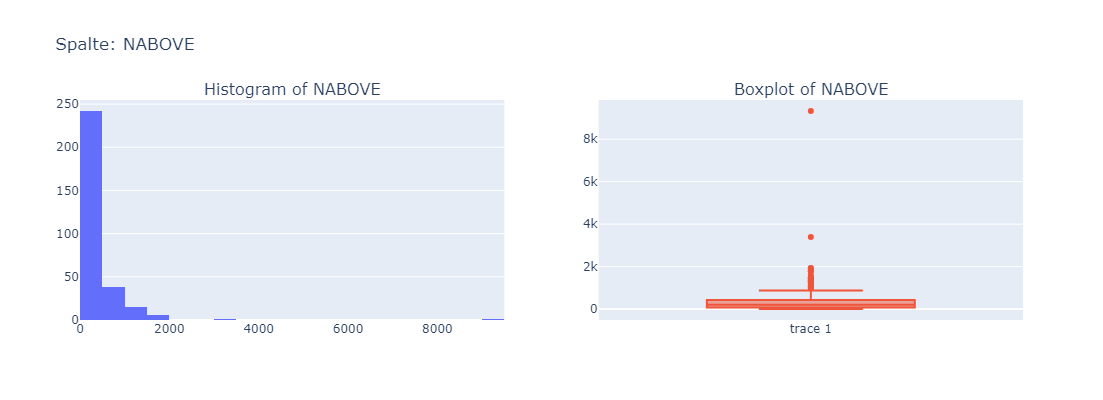

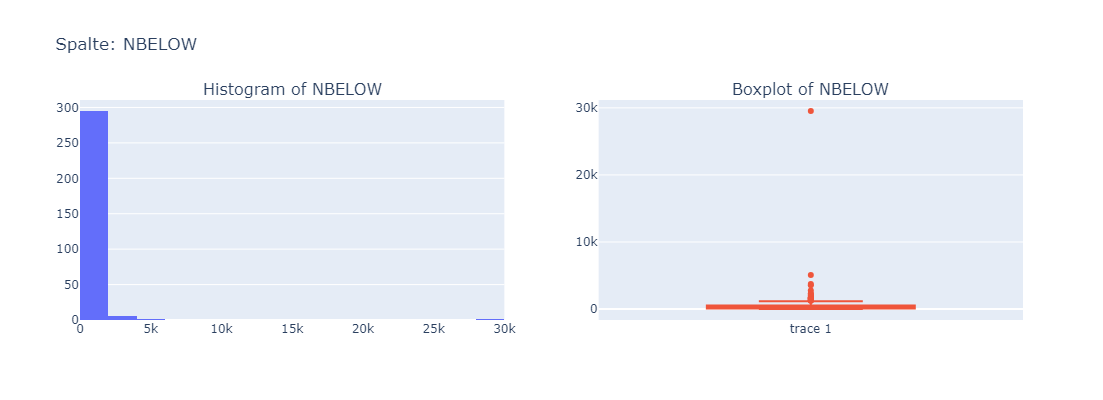

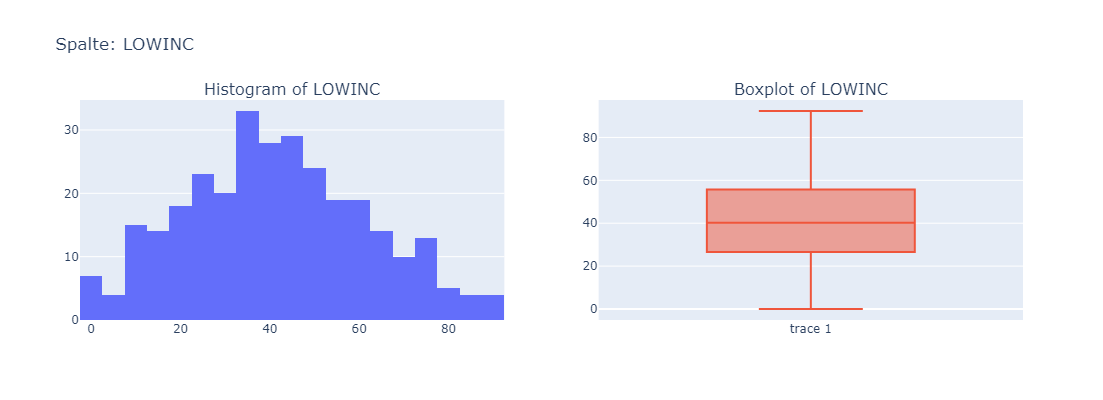

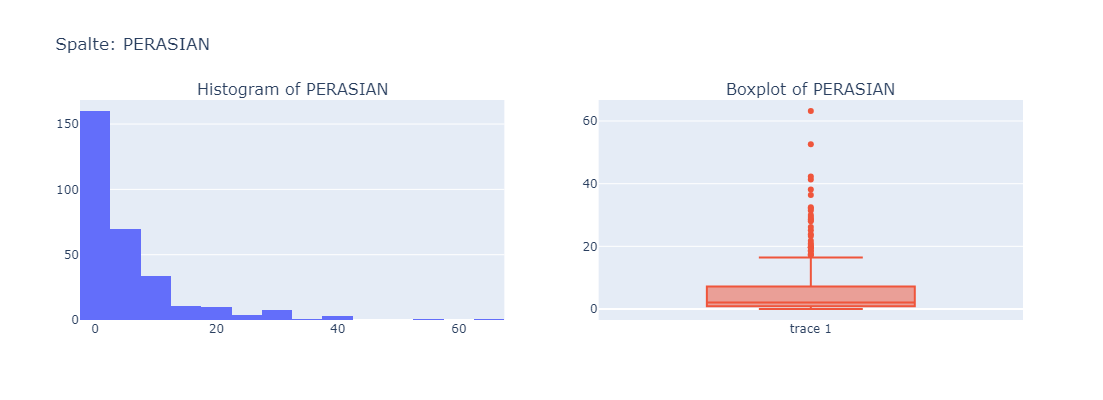

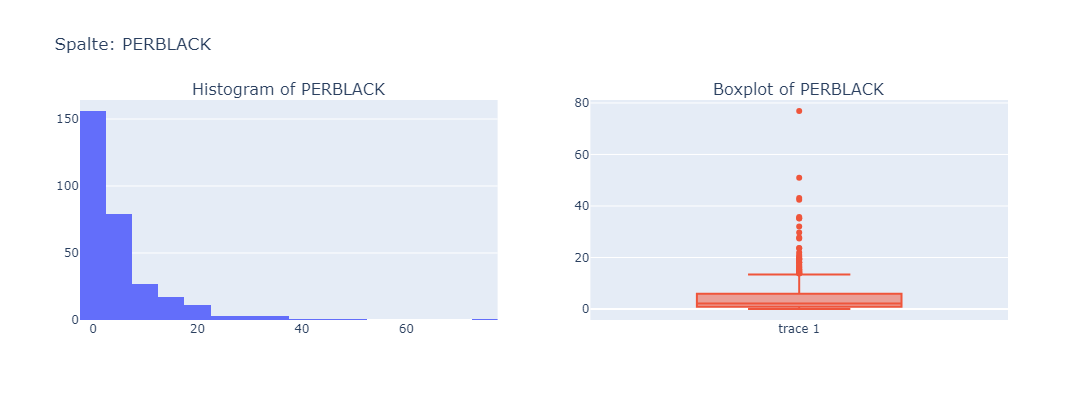

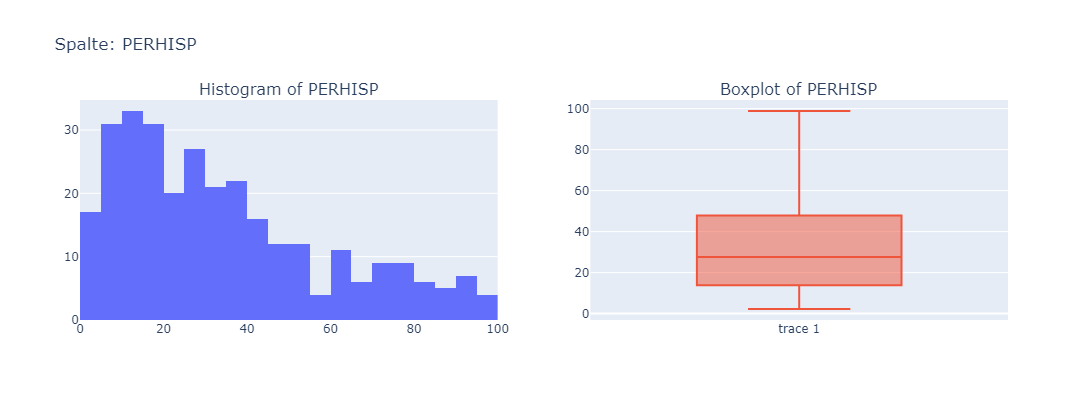

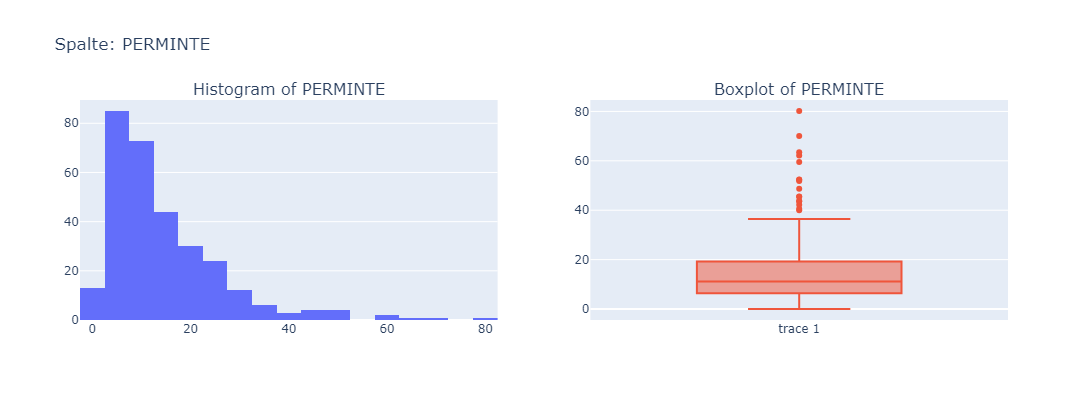

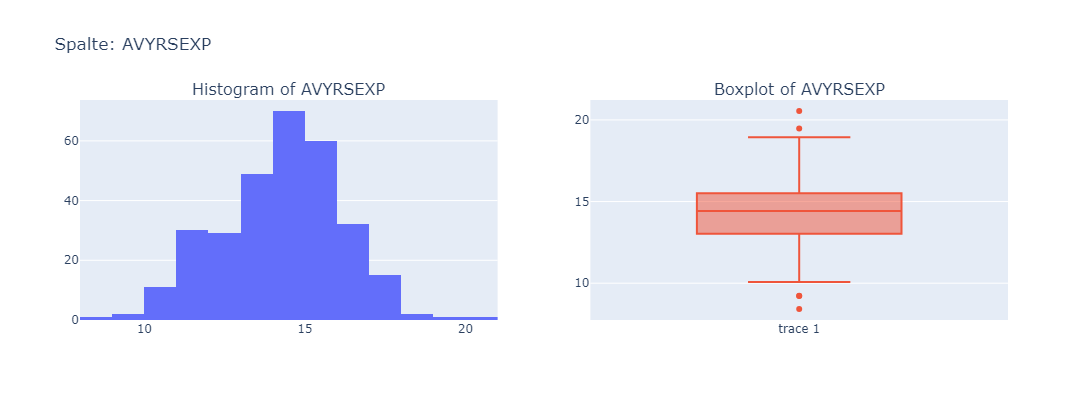

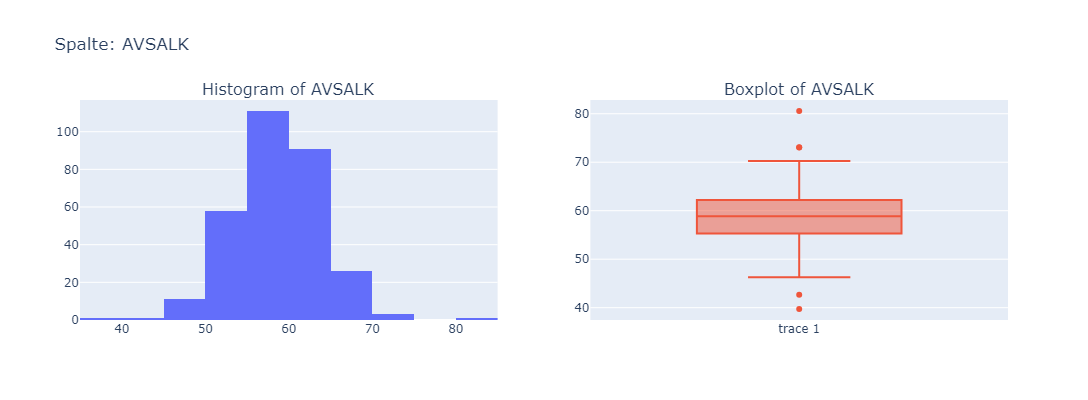

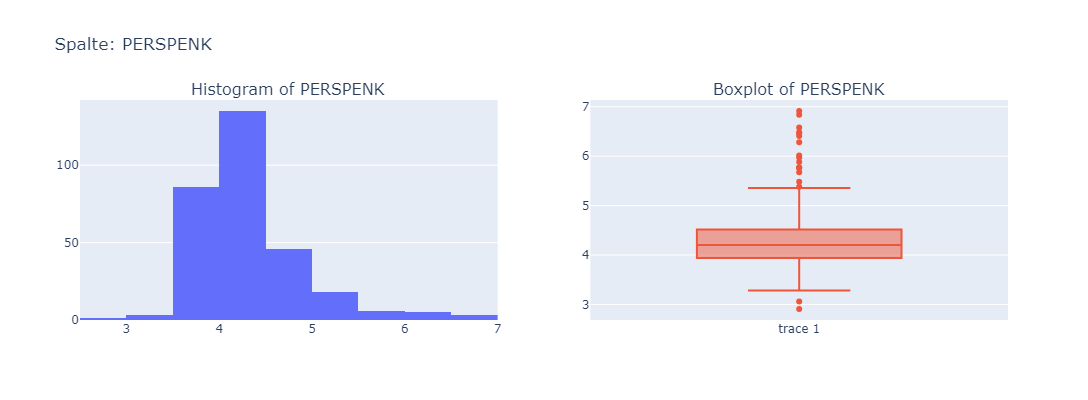

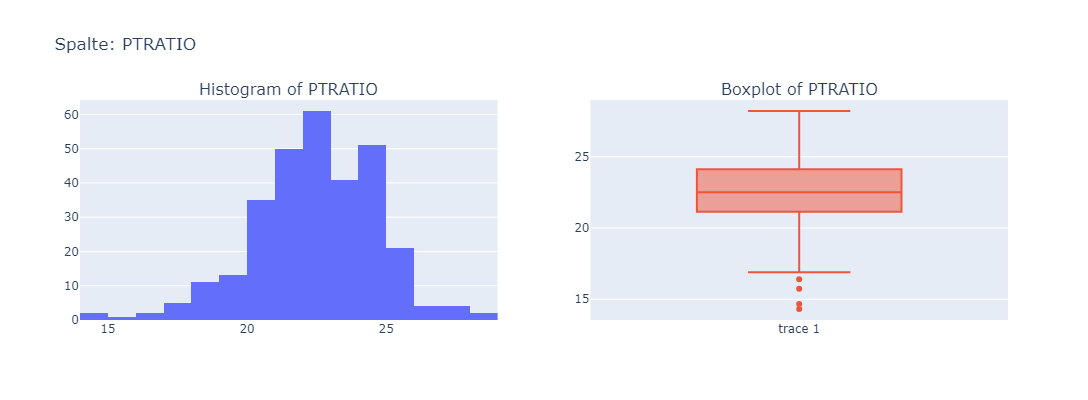

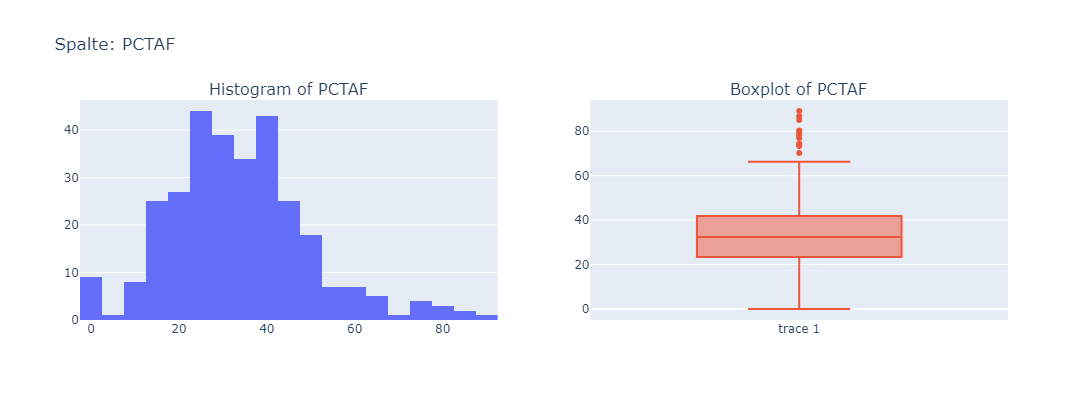

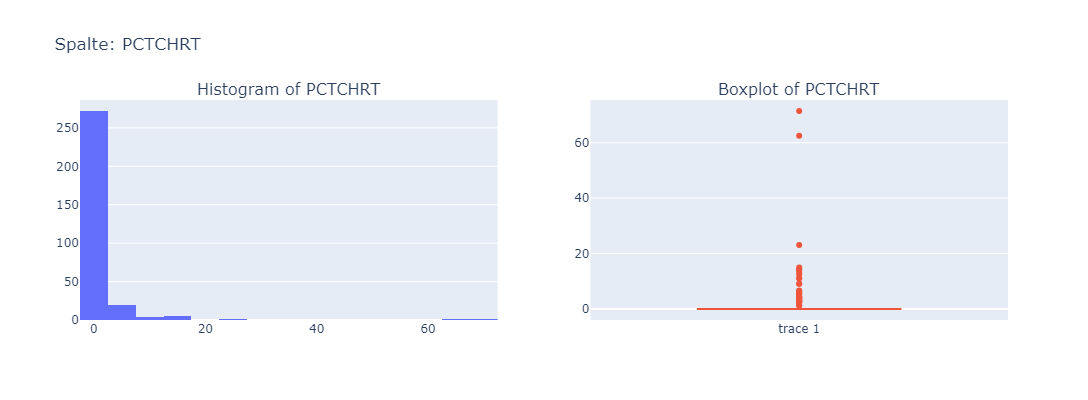

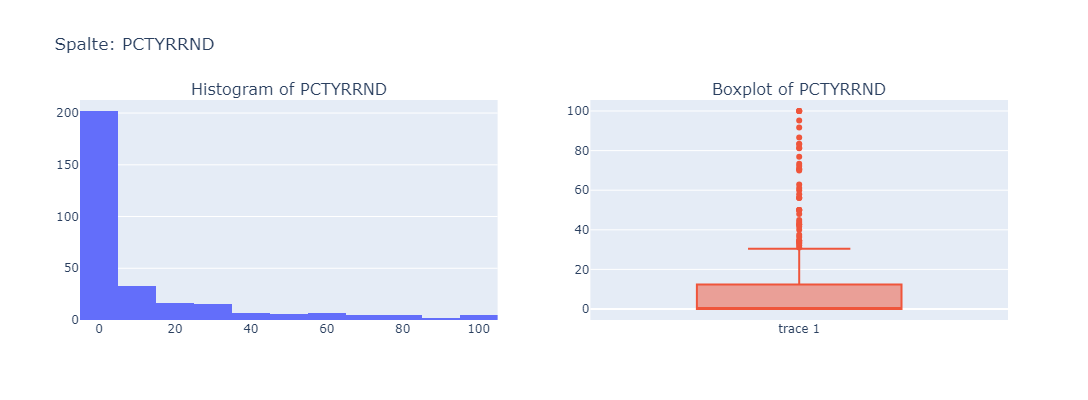

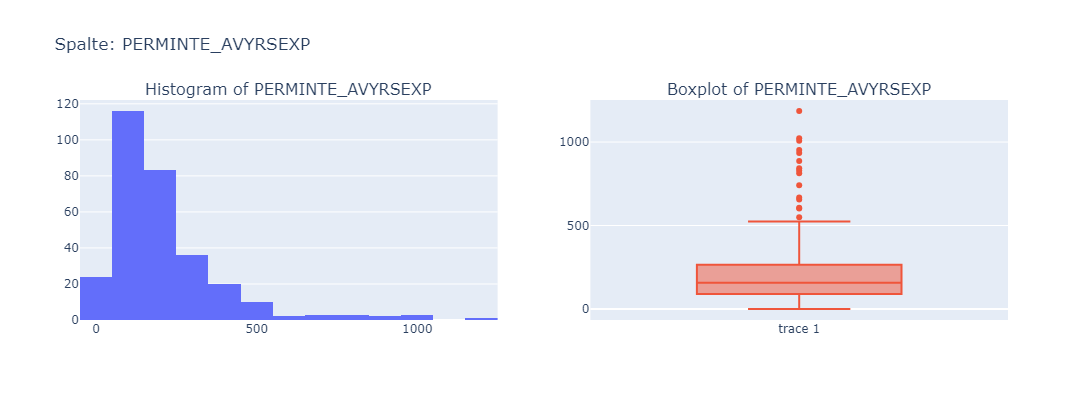

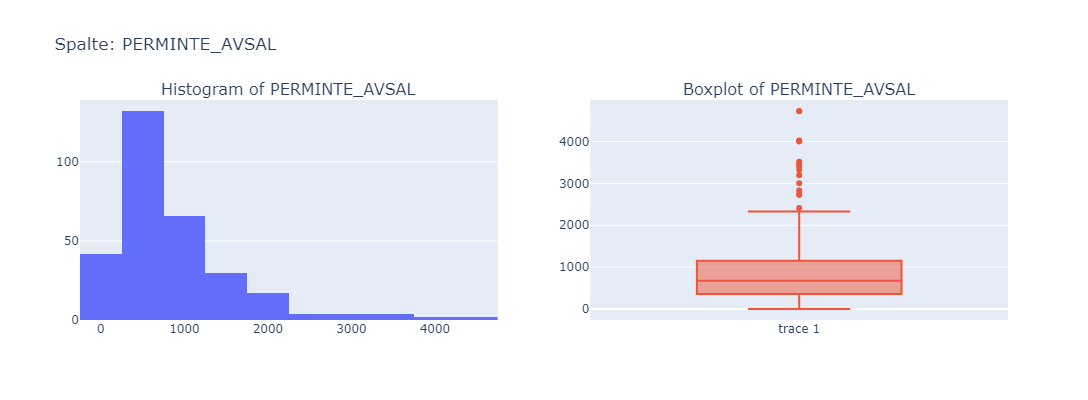

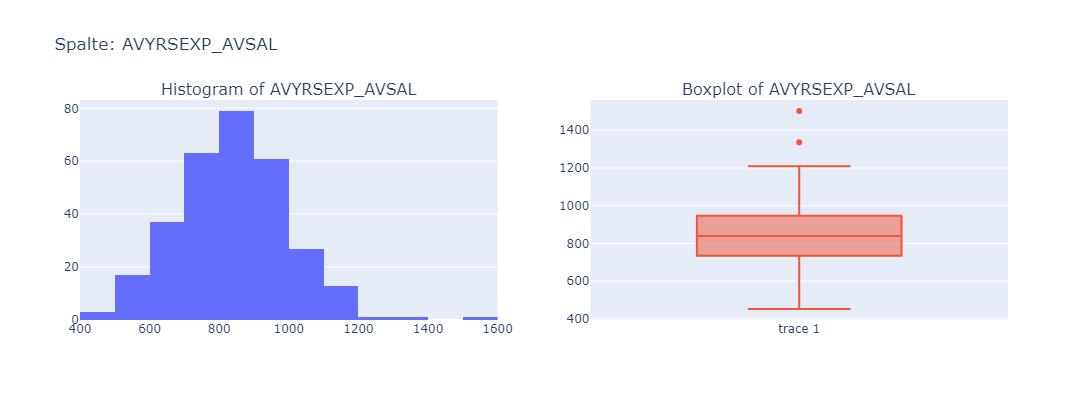

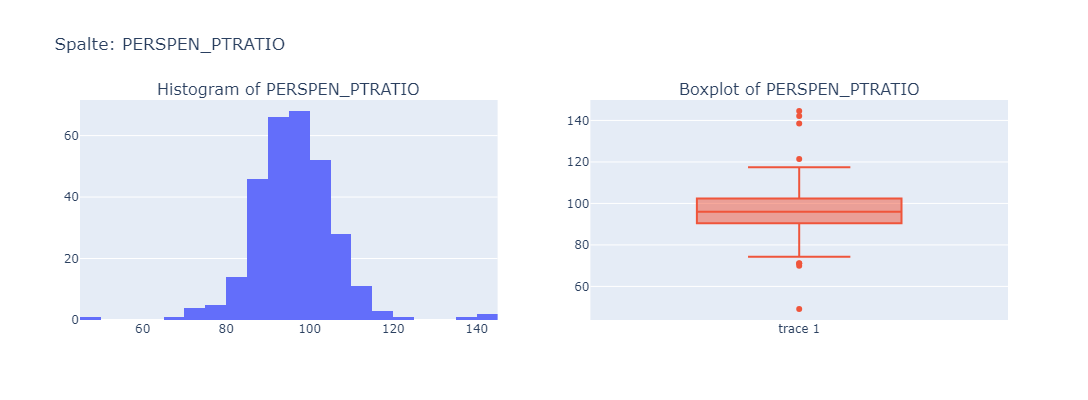

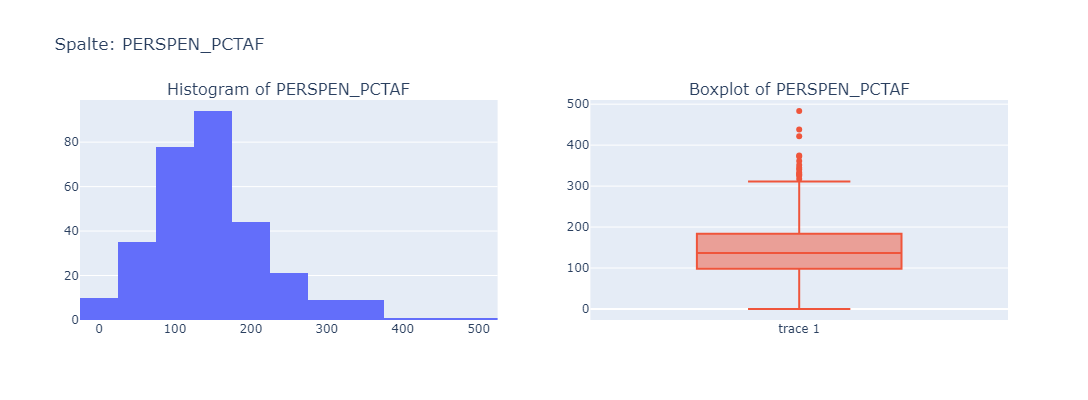

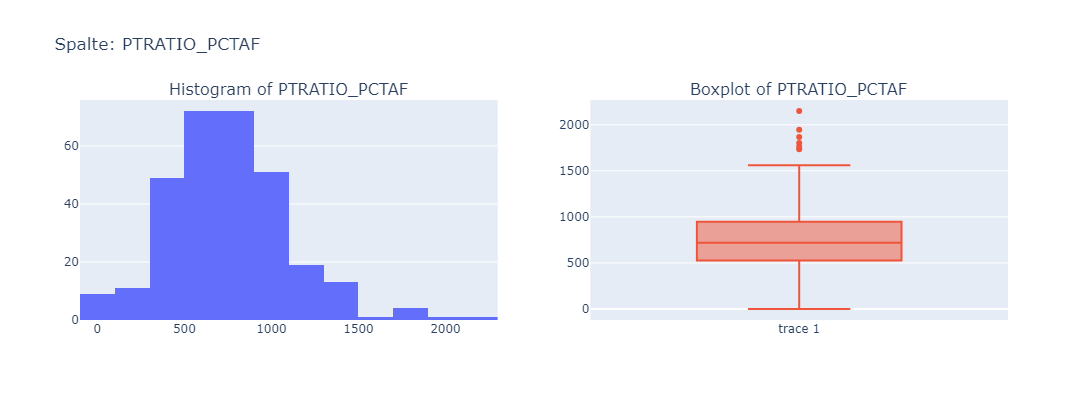

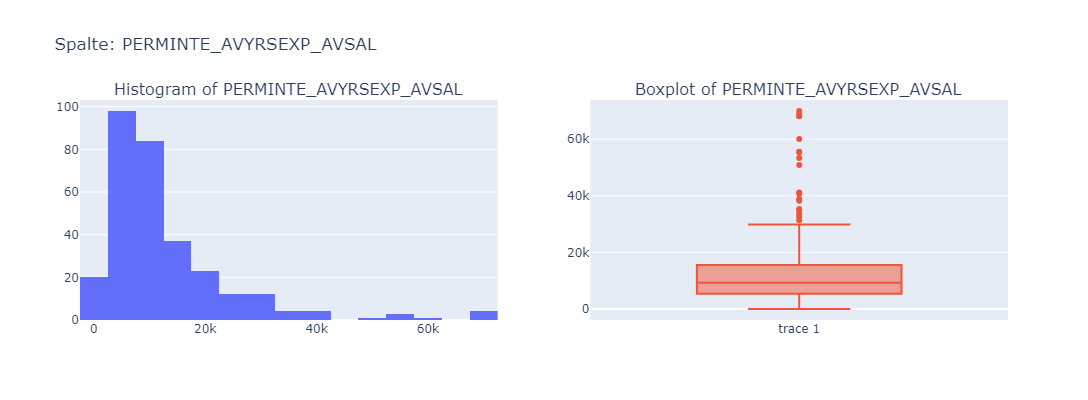

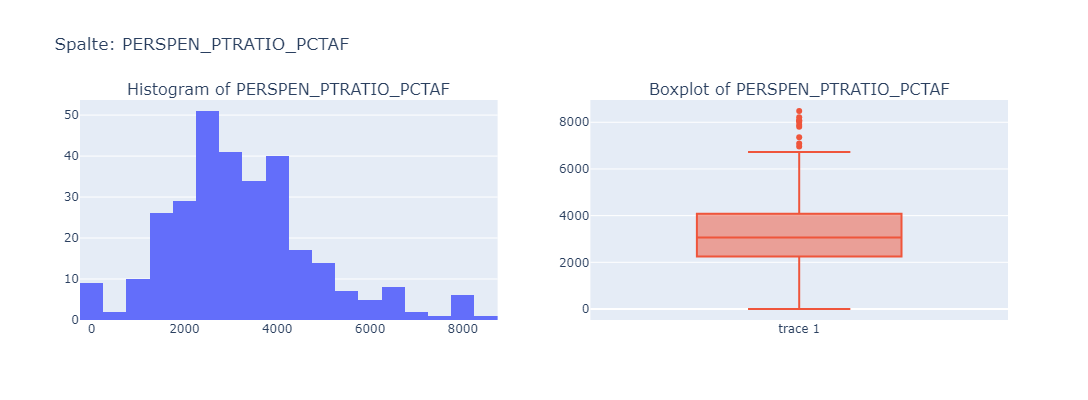

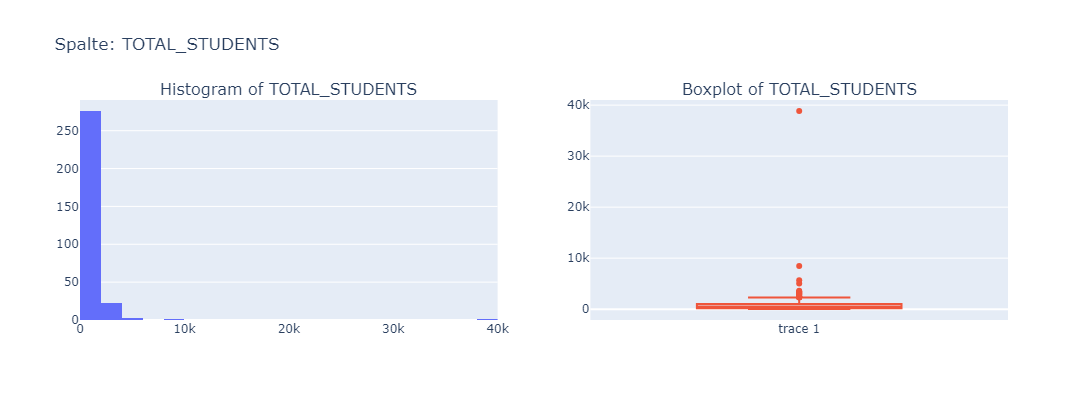

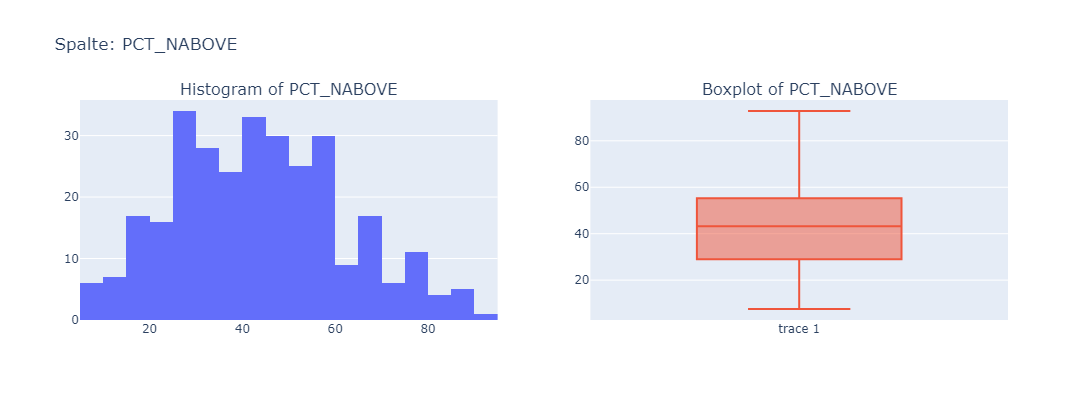

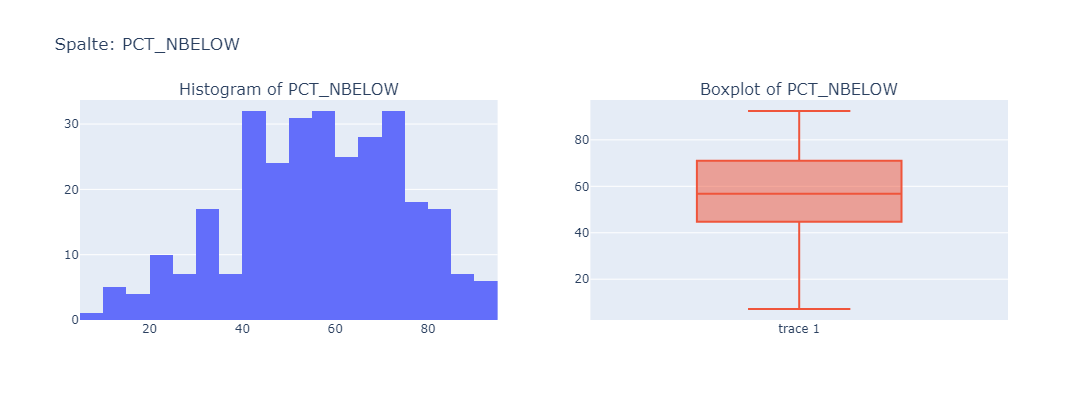

In [157]:
# Identifizieren der numerischen Spalten im DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Erstellen von Histogrammen und Boxplots für jede numerische Spalte
for col in numeric_cols:
    # Erstelle ein Subplot-Layout mit 1 Reihe und 2 Spalten
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'Histogram of {col}', f'Boxplot of {col}'))
    
    # Histogramm hinzufügen
    fig.add_trace(
        go.Histogram(x=df[col], nbinsx=20), # Sie können die Anzahl der Bins anpassen mit nbinsx
        row=1, col=1
    )
    
    # Boxplot hinzufügen
    fig.add_trace(
        go.Box(y=df[col]),
        row=1, col=2
    )
    
    # Layout anpassen
    fig.update_layout(height=400, width=800, title_text=f"Spalte: {col}", showlegend=False)
    fig.show()

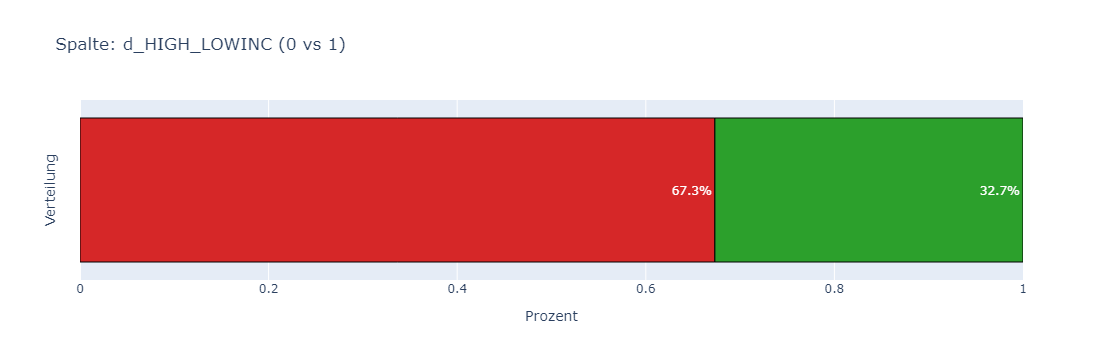

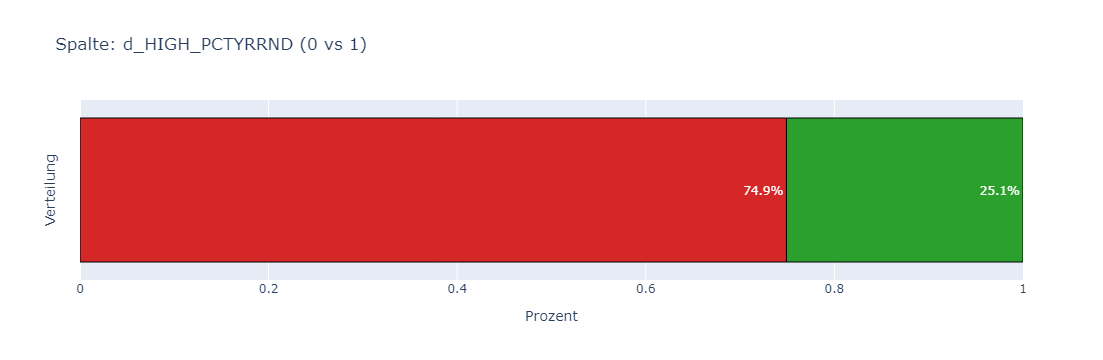

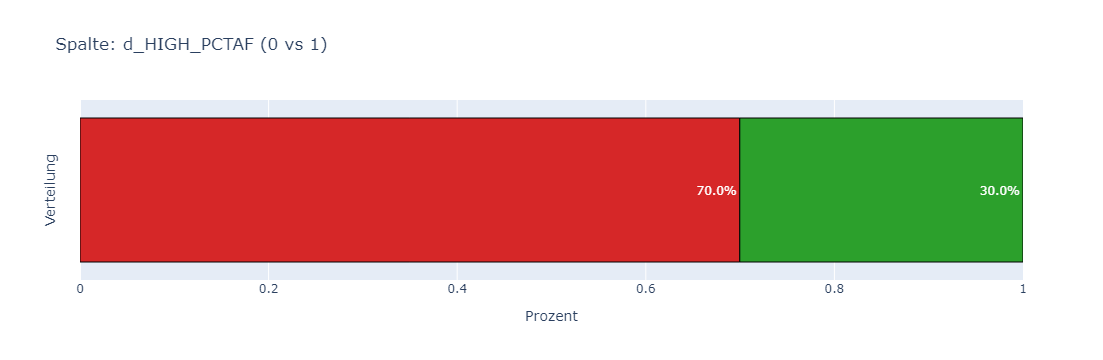

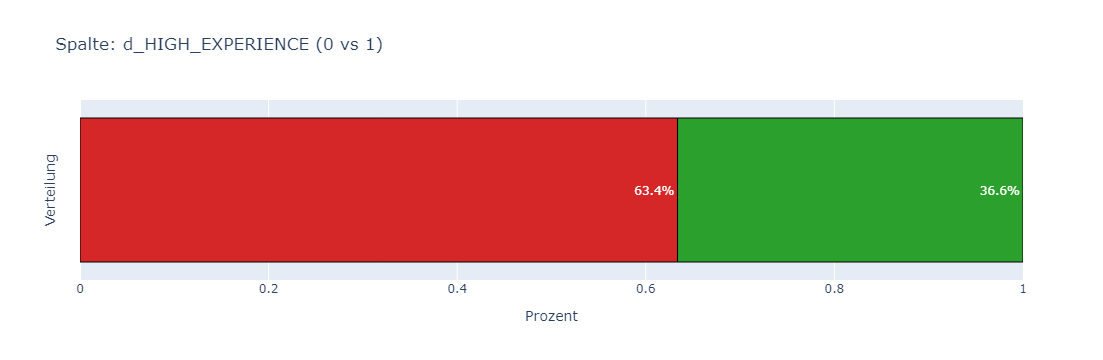

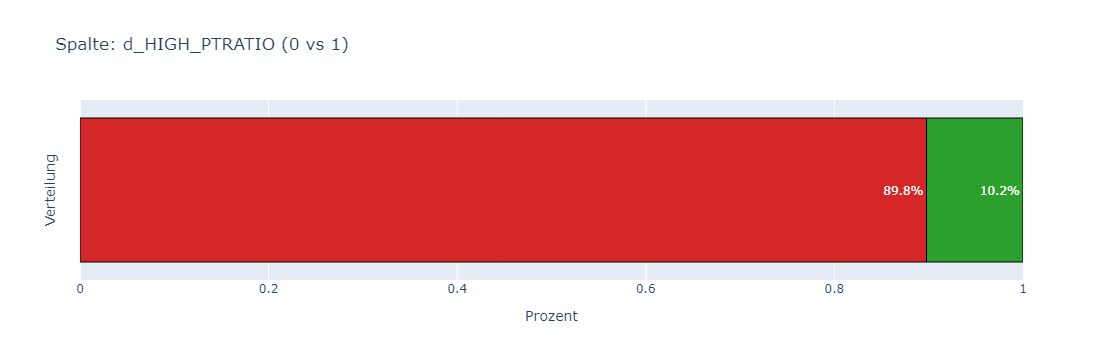

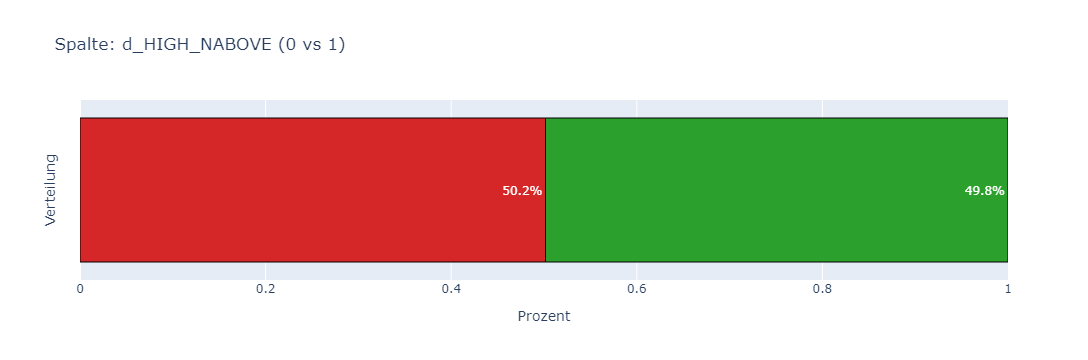

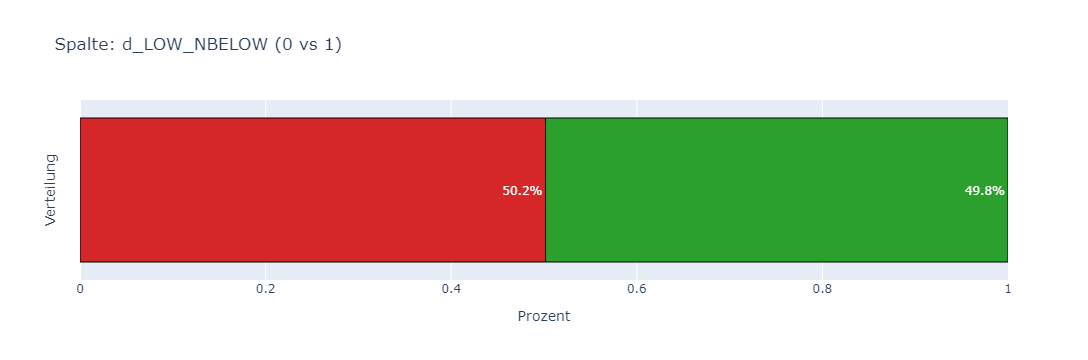

In [158]:
# Identifizieren der Dummy-Spalten im DataFrame (angenommen, sie haben das Präfix 'd_')
dummy_cols = [col for col in df.columns if col.startswith('d_')]


# Erstellen von horizontal gestapelten Balkendiagrammen für jede Dummy-Spalte
for col in dummy_cols:
    counts = df[col].value_counts(normalize=True).sort_index() 
    fig = go.Figure(go.Bar(
        x=[counts.get(0, 0), counts.get(1, 1)],  # Anteile von 0 und 1
        y=['Anteil', 'Anteil'],  # Gleiche Kategorie 'Anteil' für das Stapeln
        orientation='h',
        marker=dict(
            color=['#d62728', '#2ca02c'],  # Farben für 0 und 1
            line=dict(color='black', width=1)
        ),
        text=[f"{counts.get(0, 0)*100:.1f}%", f"{counts.get(1, 1)*100:.1f}%"],  # Prozentsätze anzeigen
        textposition='inside'
    ))

    fig.update_layout(
        title=f'Spalte: {col} (0 vs 1)',
        barmode='stack',
        xaxis=dict(
            title='Prozent',
            range=[0, 1]  # Bereich festlegen, um Konsistenz über alle Balken hinweg zu gewährleisten
        ),
        yaxis=dict(
            title='Verteilung',
            showticklabels=False  # Keine spezielle Y-Achsen-Beschriftung erforderlich
        ),
        height=300,
        width=600
    )
    fig.show()

In [159]:
df.dtypes

NABOVE                     float64
NBELOW                     float64
LOWINC                     float64
PERASIAN                   float64
PERBLACK                   float64
PERHISP                    float64
PERMINTE                   float64
AVYRSEXP                   float64
AVSALK                     float64
PERSPENK                   float64
PTRATIO                    float64
PCTAF                      float64
PCTCHRT                    float64
PCTYRRND                   float64
PERMINTE_AVYRSEXP          float64
PERMINTE_AVSAL             float64
AVYRSEXP_AVSAL             float64
PERSPEN_PTRATIO            float64
PERSPEN_PCTAF              float64
PTRATIO_PCTAF              float64
PERMINTE_AVYRSEXP_AVSAL    float64
PERSPEN_PTRATIO_PCTAF      float64
TOTAL_STUDENTS             float64
PCT_NABOVE                 float64
PCT_NBELOW                 float64
d_HIGH_LOWINC                int32
d_HIGH_PCTYRRND              int32
d_HIGH_PCTAF                 int32
d_HIGH_EXPERIENCE   

<h3> Zusammenhänge <h3>

In [160]:
# Identifizieren der numerischen und Dummy-Spalten im DataFrame
numeric_and_dummy_columns = df.select_dtypes(include=['float64', 'int64', 'int32','uint8', 'bool']).columns

# Berechnung der Korrelationen nur für numerische und Dummy-Spalten
correlation_matrix = df[numeric_and_dummy_columns].corr().round(2)

# Ausgabe der Korrelationen
correlation_matrix

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF,TOTAL_STUDENTS,PCT_NABOVE,PCT_NBELOW,d_HIGH_LOWINC,d_HIGH_PCTYRRND,d_HIGH_PCTAF,d_HIGH_EXPERIENCE,d_HIGH_PTRATIO,d_HIGH_NABOVE,d_LOW_NBELOW
NABOVE,1.00,0.89,-0.05,0.24,0.15,-0.04,0.17,0.20,0.30,-0.08,0.18,0.12,0.00,0.11,0.24,0.21,0.30,0.07,0.07,0.16,0.28,0.13,0.94,0.12,-0.12,-0.01,0.19,0.13,0.09,0.02,0.09,0.09
NBELOW,0.89,1.00,0.16,0.05,0.17,0.14,0.27,0.17,0.25,-0.05,0.14,0.01,0.01,0.14,0.34,0.31,0.27,0.08,-0.00,0.05,0.39,0.03,0.99,-0.13,0.13,0.14,0.23,0.04,0.05,0.06,-0.13,-0.13
LOWINC,-0.05,0.16,1.00,-0.26,0.11,0.72,0.51,-0.24,-0.05,-0.03,0.08,-0.45,-0.05,0.15,0.46,0.49,-0.19,0.04,-0.42,-0.45,0.44,-0.44,0.10,-0.83,0.83,0.80,0.20,-0.36,-0.27,0.17,-0.69,-0.69
PERASIAN,0.24,0.05,-0.26,1.00,0.14,-0.23,0.08,0.21,0.17,-0.01,0.08,0.27,-0.04,-0.05,0.11,0.08,0.23,0.07,0.25,0.30,0.11,0.29,0.11,0.38,-0.38,-0.12,0.01,0.24,0.18,-0.07,0.25,0.25
PERBLACK,0.15,0.17,0.11,0.14,1.00,-0.05,0.44,0.03,0.20,-0.05,0.12,0.02,-0.00,0.18,0.45,0.44,0.11,0.06,0.00,0.04,0.44,0.02,0.17,-0.22,0.22,0.10,0.22,0.01,-0.00,0.13,-0.21,-0.21
PERHISP,-0.04,0.14,0.72,-0.23,-0.05,1.00,0.63,-0.23,0.05,-0.20,0.29,-0.36,-0.02,0.07,0.57,0.61,-0.13,0.03,-0.38,-0.32,0.55,-0.35,0.09,-0.71,0.71,0.60,0.10,-0.30,-0.22,0.25,-0.60,-0.60
PERMINTE,0.17,0.27,0.51,0.08,0.44,0.63,1.00,-0.02,0.28,-0.12,0.33,-0.16,-0.09,0.10,0.98,0.99,0.13,0.16,-0.18,-0.10,0.96,-0.13,0.25,-0.50,0.50,0.46,0.16,-0.12,-0.05,0.30,-0.42,-0.42
AVYRSEXP,0.20,0.17,-0.24,0.21,0.03,-0.23,-0.02,1.00,0.39,0.26,0.03,0.31,-0.02,-0.11,0.14,0.03,0.90,0.35,0.33,0.33,0.17,0.37,0.18,0.29,-0.29,-0.15,-0.05,0.23,0.76,-0.06,0.24,0.24
AVSALK,0.30,0.25,-0.05,0.17,0.20,0.05,0.28,0.39,1.00,0.14,0.49,0.02,-0.14,0.16,0.34,0.37,0.75,0.64,0.04,0.12,0.41,0.15,0.27,0.06,-0.06,0.00,0.16,-0.02,0.31,0.29,0.03,0.03
PERSPENK,-0.08,-0.05,-0.03,-0.01,-0.05,-0.20,-0.12,0.26,0.14,1.00,-0.58,0.20,0.04,-0.24,-0.09,-0.10,0.25,0.62,0.46,0.07,-0.07,0.33,-0.06,0.16,-0.16,0.04,-0.23,0.18,0.22,-0.22,0.11,0.11


<h3> Daten auswählen <h3>

**Ziel der Analyse**: Untersuchen, ob die Lehrerfahrung einen Einfluss auf die mathematische Leistung der Schüler hat, gemessen am Prozentsatz der Schüler, die über dem nationalen Median in standardisierten Mathematiktests liegen.<br>
<br>
**Unabhängige Variable**: <br>
<br>
AVYRSEXP (Durchschnittliche Lehrerfahrung in Jahren): Diese Variable könnte eine signifikante Auswirkung auf die Leistung der Schüler haben, da angenommen wird, dass erfahrene Lehrkräfte über bessere pädagogische Fähigkeiten verfügen und effektiver im Unterrichten sein könnten.<br>
<br>
**Abhängige Variable**: <br>
<br>
PCT_NABOVE (Prozentsatz der Schüler, die über dem nationalen Median auf dem mathematischen Leistungstest liegen): Dies ist ein direkter Indikator für die akademische Leistung der Schüler in Mathematik und gibt an, wie gut Schüler im Vergleich zu einem nationalen Standard abschneiden.<br>
<br>
**Hypothese**: Es wird vermutet, dass Schulbezirke mit durchschnittlich erfahreneren Lehrkräften einen höheren Prozentsatz an Schülern aufweisen, die über dem Median ihrer mathematischen Testergebnisse liegen. Erfahrung könnte mit besseren Lehrmethoden, effektiverem Klassenmanagement und einer positiveren Lernumgebung korrelieren, die alle zur Steigerung der Schülerleistung beitragen könnten.<br>

In [161]:
x='AVYRSEXP'
y='PCT_NABOVE'

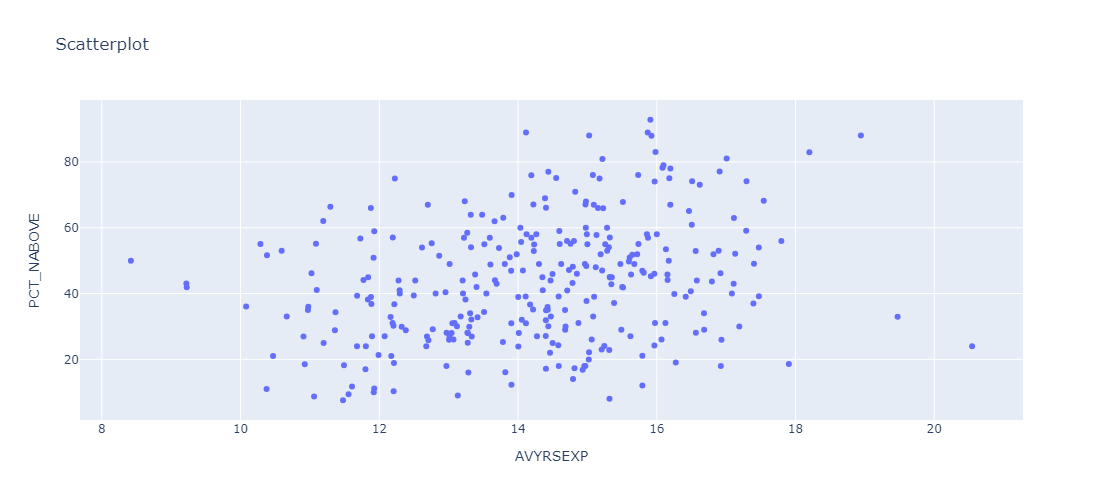

In [162]:
fig_scatter = px.scatter(df, x=x, y=y, title='Scatterplot')
fig_scatter.update_layout(height=500)
fig_scatter.show()

<h3> Modelle <h3>

In [163]:
# Neue x und y?
# x = ?
# y = ?

Standardisieren

* Vorteile: Vergleichbarkeit zwischen den Prädiktoren
* Nachteile: Man "verliert" die Intuition der Einheiten

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['z_x', 'z_y']] = scaler.fit_transform(df[[x, y]])

Vergleichen wir die Rechnung mit und ohne Standardisierung

Lineare Regression

In [165]:
# Entfernen von Zeilen mit fehlenden Werten in den relevanten Spalten (ACHTUNG: HIER WERDEN DIE FEHLENDEN WERTE BEHANDELT)
df_clean = df[[x, y]].dropna()

# Unabhängige Variable
X = df_clean[[x]]

# Abhängige Variable
y = df_clean[y]

# Hinzufügen einer Konstanten (Intercept) zu den unabhängigen Variablen
X = sm.add_constant(X)

# Erstellen des Modells
model = sm.OLS(y, X).fit()

# Ausgabe der Modellzusammenfassung
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PCT_NABOVE   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     27.02
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           3.72e-07
Time:                        01:22:07   Log-Likelihood:                -1299.2
No. Observations:                 303   AIC:                             2602.
Df Residuals:                     301   BIC:                             2610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9742      7.709      0.516      0.6

**Interpretation der Regressionsergebnisse** <br>
<br>
**Koeffizient von AVYRSEXP**: Der Koeffizient für AVYRSEXP beträgt 2.7869, was bedeutet, dass mit jedem zusätzlichen Jahr an Lehrerfahrung der Prozentsatz der Schüler, die über dem Median liegen, im Durchschnitt um etwa 2.79 Prozentpunkte steigt. Dies ist statistisch signifikant mit einem p-Wert von nahezu 0 (p < 0.001), was darauf hindeutet, dass die Lehrerfahrung tatsächlich einen positiven Einfluss auf die Schülerleistungen hat.<br>
<br>
**Konstante (const)**: Die Konstante ist statistisch nicht signifikant (p = 0.607), was darauf hinweist, dass, wenn die Lehrerfahrung null Jahre beträgt, der erwartete Prozentsatz der Schüler, die über dem Median liegen, nicht signifikant von dem Mittelwert abweicht, den das Modell hier anzeigt (3.9742%).<br>
<br>
**R²-Wert**: Der R²-Wert von 0.082 bedeutet, dass etwa 8.2% der Variabilität in der abhängigen Variable (PCT_NABOVE) durch die unabhängige Variable (AVYRSEXP) erklärt werden können. Dies zeigt, dass, obwohl ein signifikanter Zusammenhang besteht, viele andere Faktoren die Schülerleistungen beeinflussen, die nicht durch die Lehrerfahrung abgedeckt werden.<br>
<br>
**F-Statistik**: Der Wert der F-Statistik ist 27.02 mit einem sehr kleinen p-Wert (3.72e-07), was darauf hinweist, dass das Modell insgesamt signifikant ist und die unabhängige Variable (Lehrerfahrung) eine relevante Variable für die Vorhersage der Schülerleistungen ist.

Schlussfolgerungen und pädagogische Implikationen

* Lehrerfahrung ist wichtig: Die Ergebnisse bestätigen, dass erfahrene Lehrkräfte tendenziell einen positiven Einfluss auf die akademischen Leistungen ihrer Schüler haben, speziell in Mathematik. Bildungspolitische Entscheidungsträger und Schulverwaltungen sollten daher Überlegungen anstellen, wie sie erfahrene Lehrkräfte unterstützen, weiterbilden und gegebenenfalls in Schlüsselbereichen einsetzen können.

* Weitere Forschung erforderlich: Der relativ niedrige R²-Wert zeigt, dass weitere Untersuchungen notwendig sind, um andere Faktoren zu identifizieren, die ebenfalls einen bedeutenden Einfluss auf die Schülerleistungen haben könnten. Hierzu könnten Variablen wie Schüler-Lehrer-Verhältnis, Qualität der Lehrmaterialien, Schulinfrastruktur oder die sozioökonomische Zusammensetzung der Schülerpopulation gehören.

* Entwicklung professioneller Fortbildungen: Die Ergebnisse legen nahe, dass Investitionen in die professionelle Entwicklung von Lehrkräften sich positiv auf die Schülerleistungen auswirken können. Schulsysteme könnten von gezielten Programmen profitieren, die darauf abzielen, die pädagogischen Fähigkeiten und das Fachwissen von Lehrern zu verbessern.

Insgesamt bestätigt diese Analyse die Bedeutung der Lehrerfahrung als einen kritischen Faktor für den Erfolg der Schüler und unterstreicht die Notwendigkeit, Lehrkräfte in ihrer beruflichen Laufbahn kontinuierlich zu fördern und zu unterstützen.

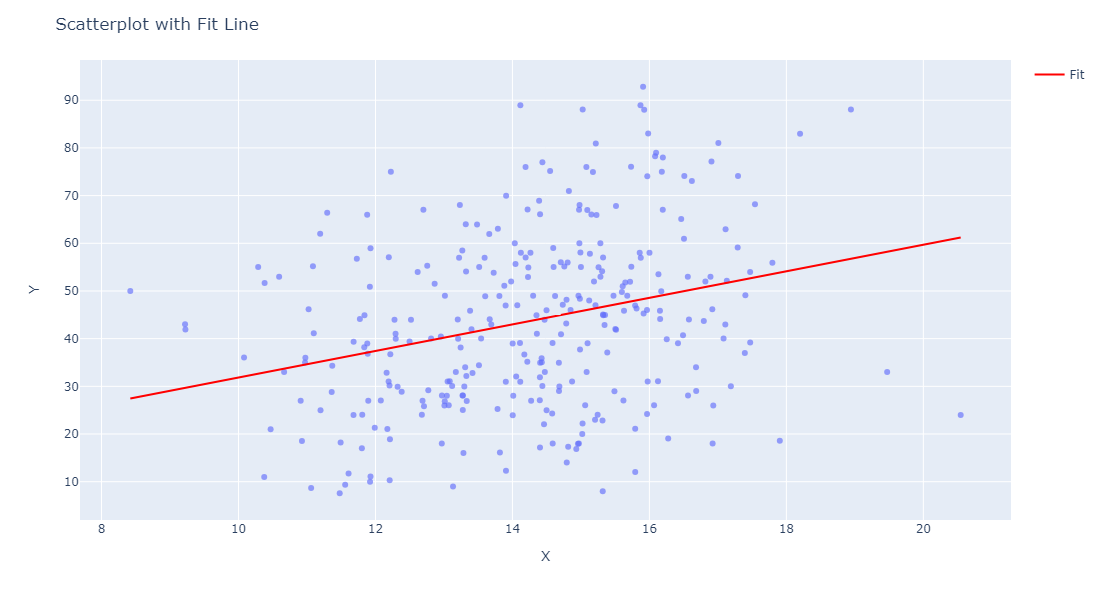

In [166]:
# Vorhersagen mit dem Modell erstellen
df_clean['prediction'] = model.predict(X)

# Scatterplot mit Fit-Linie erstellen
fig = px.scatter(df_clean, x=x, y=y, opacity=0.65)
fig.add_trace(go.Scatter(x=df_clean[x], y=df_clean['prediction'],
                         mode='lines', name='Fit', line=dict(color='red')))

# Layout anpassen
fig.update_layout(title='Scatterplot with Fit Line',
                  xaxis_title='X',
                  yaxis_title='Y',
                 height=600)

fig.show()

Jetzt mit den standardisierten Variablen:

In [167]:
# Entfernen von Zeilen mit fehlenden Werten in den relevanten Spalten (ACHTUNG: HIER WERDEN DIE FEHLENDEN WERTE BEHANDELT)
df_clean = df[['z_x', 'z_y']].dropna()

# Unabhängige Variable
X = df_clean[['z_x']]

# Abhängige Variable
y = df_clean['z_y']

# Hinzufügen einer Konstanten (Intercept) zu den unabhängigen Variablen
X = sm.add_constant(X)

# Erstellen des Modells
model = sm.OLS(y, X).fit()

# Ausgabe der Modellzusammenfassung
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    z_y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     27.02
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           3.72e-07
Time:                        01:22:08   Log-Likelihood:                -416.91
No. Observations:                 303   AIC:                             837.8
Df Residuals:                     301   BIC:                             845.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.747e-16      0.055  -6.79e-15      1.0

Interpretation der standardisierten Regressionsergebnisse
* Koeffizient von z_x: Der standardisierte Koeffizient beträgt 0.287, was darauf hindeutet, dass mit jeder Standardabweichung, um die die Lehrerfahrung zunimmt, die Schülerleistung im Durchschnitt um 0.287 Standardabweichungen steigt. Dies bestätigt erneut, dass eine höhere Lehrerfahrung positiv mit der Schülerleistung korreliert ist. Der Koeffizient ist statistisch signifikant mit einem p-Wert von weniger als 0.001.

* Konstante (const): Die Konstante ist praktisch null (-3.747e-16) und statistisch nicht signifikant, was in einer standardisierten Regression erwartet wird, da der Mittelwert der z-transformierten Variablen null ist.

* R²-Wert: Der R²-Wert von 0.082 bleibt unverändert und zeigt, dass das Modell etwa 8.2% der Variabilität in den standardisierten Schülerleistungswerten erklärt. Auch wenn dies darauf hinweist, dass weitere Variablen zur vollständigen Erklärung der Schülerleistung erforderlich sind, bestätigt es die Bedeutung der Lehrerfahrung als signifikanten Faktor.

* F-Statistik: Die F-Statistik und ihr sehr kleiner p-Wert (3.72e-07) bleiben konsistent und unterstreichen die statistische Signifikanz des Gesamtmodells.

**Vorteile der Verwendung standardisierter Variablen** <br>
Die Verwendung von standardisierten Variablen (z-Scores) in der Regression ermöglicht es, die Effektgrößen verschiedener Variablen direkt miteinander zu vergleichen, auch wenn sie ursprünglich in unterschiedlichen Maßeinheiten gemessen wurden. Dies kann besonders nützlich sein, wenn du ein Modell mit mehreren Prädiktoren erstellst, das verschiedene Arten von Variablen umfasst.
<br>
<br>
**Weiterführende Überlegungen**<br>
* Einbeziehung weiterer Variablen: Um den R²-Wert zu verbessern und ein umfassenderes Verständnis der Faktoren zu erlangen, die die Schülerleistung beeinflussen, könntest du zusätzliche Variablen in das Modell einbeziehen, wie z.B. Schüler-Lehrer-Verhältnis, Qualität der Schulinfrastruktur, sozioökonomischer Status der Schülerfamilien oder Engagement der Eltern.

* Analyse von Interaktionseffekten: Es könnte auch aufschlussreich sein, Interaktionseffekte zwischen der Lehrerfahrung und anderen relevanten Variablen zu untersuchen, um zu sehen, ob die Kombination bestimmter Bedingungen die Schülerleistung besonders stark beeinflusst.

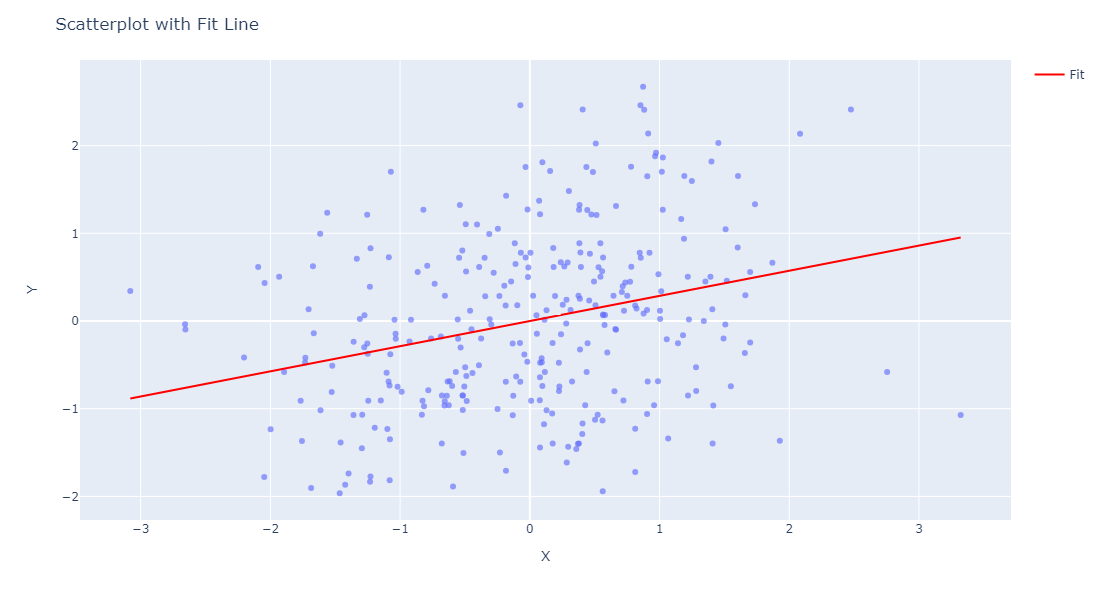

In [168]:
# Vorhersagen mit dem Modell erstellen
df_clean['prediction'] = model.predict(X)

# Scatterplot mit Fit-Linie erstellen
fig = px.scatter(df_clean, x='z_x', y='z_y', opacity=0.65)
fig.add_trace(go.Scatter(x=df_clean['z_x'], y=df_clean['prediction'],
                         mode='lines', name='Fit', line=dict(color='red')))

# Layout anpassen
fig.update_layout(title='Scatterplot with Fit Line',
                  xaxis_title='X',
                  yaxis_title='Y',
                 height=600)

fig.show()

Interpretation???

Logistische Regression

In [187]:
# Neue x und y
x='AVYRSEXP'
y='d_HIGH_NABOVE'

In [188]:
# Entfernen von Zeilen mit fehlenden Werten in den relevanten Spalten
df_clean = df[[x, y]].dropna()

# Unabhängige Variable und abhängige Variable nach dem Bereinigen neu definieren
X = df_clean[[x]]
y = df_clean[y]

# Hinzufügen einer Konstanten zu den unabhängigen Variablen
X = sm.add_constant(X)

# Erstellen des logistischen Regressionsmodells
model = sm.Logit(y, X).fit()

# Ausgabe der Modellzusammenfassung
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.663043
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          d_HIGH_NABOVE   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                 0.04342
Time:                        01:53:32   Log-Likelihood:                -200.90
converged:                       True   LL-Null:                       -210.02
Covariance Type:            nonrobust   LLR p-value:                 1.948e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8746      0.955     -4.059      0.000      -5.745      -2.004
AVYRSEXP       0.2712      0.

**Interpretation der logistischen Regressionsergebnisse**<br>
<br>
* Koeffizient von AVYRSEXP: Der Koeffizient für AVYRSEXP ist positiv und beträgt 0.2712. Dies bedeutet, dass mit jedem zusätzlichen Jahr an Lehrerfahrung die Chancen, dass der Prozentsatz der Schüler, die über dem Median liegen, als hoch klassifiziert wird, steigen. Die Tatsache, dass der Koeffizient signifikant ist (p < 0.001), unterstützt die Annahme, dass mehr Lehrerfahrung positiv mit höheren Schülerleistungen korreliert ist.<br>
<br>
* Konstante (const): Der Wert der Konstante ist -3.8746 mit einem p-Wert von weniger als 0.001, was darauf hinweist, dass die Basischance (Log-Odds) für eine Schule, als hochleistend eingestuft zu werden, ohne die Berücksichtigung der Lehrerfahrung relativ niedrig ist.<br>
<br>
* (Pseudo R²: Der Pseudo R-squared Wert von 0.04342 zeigt an, dass das Modell eine gewisse, jedoch begrenzte Erklärungskraft für die Variation in der abhängigen Variable bietet. Dies ist typisch für logistische Regressionen, da diese Art von Modell dazu neigt, konservativere R²-Werte zu produzieren.)<br>
<br>
* Log-Likelihood und LLR p-value: Die Log-Likelihood von -200.90 verbessert sich im Vergleich zum Nullmodell (LL-Null: -210.02), was auf eine Verbesserung des Modells durch die Aufnahme der Lehrerfahrung hinweist. Der LLR p-Wert (1.948e-05) zeigt an, dass das Modell statistisch signifikant besser ist als ein Modell ohne Prädiktoren.<br>
<br>


**Implikationen**<br>
Bedeutung der Lehrerfahrung: Diese Analyse unterstreicht die Bedeutung erfahrener Lehrkräfte für die Steigerung der Schülerleistungen in Mathematik. Schulverwaltungen sollten die Lehrerfahrung als einen wichtigen Faktor bei der Einstellung und Zuweisung von Lehrern zu Klassen berücksichtigen.<br>
<br>

Weitere Forschung: Angesichts des relativ geringen Pseudo R²-Wertes könnten zusätzliche Variablen, die die Schul- und Klassenumgebung sowie die sozioökonomischen Hintergründe der Schüler abbilden, in zukünftigen Modellen berücksichtigt werden, um ein vollständigeres Bild der Faktoren zu erhalten, die die Schülerleistung beeinflussen.

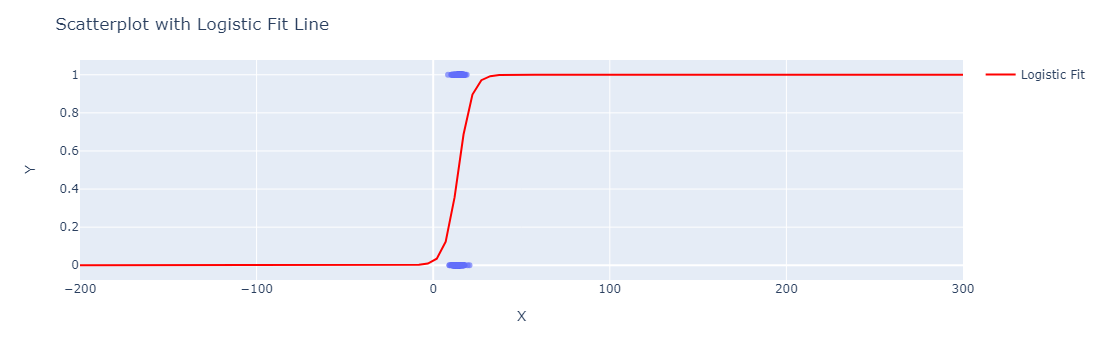

In [189]:
# Vorhersagewahrscheinlichkeiten für den gesamten Datensatz
df_clean['prediction_prob'] = model.predict(X)

# Erstellen von Datenpunkten für die logistische Kurve
x_vals = np.linspace(-200, 300, 100)

# Berechnen der logistischen Kurve basierend auf den Modellparametern
log_odds = model.params[0] + model.params[1] * x_vals
y_vals = 1 / (1 + np.exp(-log_odds))

# Scatterplot mit logistischer Kurve erstellen
fig = px.scatter(df_clean, x=x, y=y, opacity=0.65)
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Logistic Fit', line=dict(color='red')))
#fig.add_trace(go.Scatter(x=df_clean[x], y=df_clean[y], mode='markers', name='Predicted Probabilities', marker=dict(color='green'), opacity=0.65))

# Layout anpassen
fig.update_layout(title='Scatterplot with Logistic Fit Line',
                  xaxis_title='X',
                  yaxis_title='Y')

fig.show()

In [198]:
# Unabhängige Variable standardisieren
X_scaled = scaler.fit_transform(df[[x]])

# Hinzufügen einer Konstanten zu den unabhängigen Variablen
X = sm.add_constant(X_scaled)

# Erstellen des logistischen Regressionsmodells
model = sm.Logit(y, X).fit()

# Ausgabe der Modellzusammenfassung
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.663043
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          d_HIGH_NABOVE   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                 0.04342
Time:                        01:59:49   Log-Likelihood:                -200.90
converged:                       True   LL-Null:                       -210.02
Covariance Type:            nonrobust   LLR p-value:                 1.948e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0086      0.118     -0.073      0.942      -0.241       0.224
x1             0.5138      0.

**Vergleich Standisierung vs keine Standardisierung:**
* Koeffizient nicht-standardisiert (0.2712): Dies bedeutet, dass für jedes zusätzliche Jahr an Lehrerfahrung die log-Odds, dass eine Schule eine hohe Leistung erreicht, um 0.2712 steigen. Dies ist statistisch signifikant (p < 0.001).

* Koeffizient standardisiert (0.5138): Dies bedeutet, dass für jede Standardabweichung Erhöhung in der Lehrerfahrung die log-Odds, dass eine Schule eine hohe Leistung erreicht, um 0.5138 steigen. Dies ist ebenfalls statistisch signifikant (p < 0.001).

  
* Konstante nicht-standardisiert (-3.8746): Dies repräsentiert die log-Odds für eine Schule mit null Jahren Lehrerfahrung. Dies ist schwer zu interpretieren, da null Jahre Lehrerfahrung nicht realistisch sind.

* Konstanten standardisiert (-0.0086): Da die Variablen standardisiert sind, repräsentiert die Konstante die log-Odds für eine Schule mit durchschnittlicher Lehrerfahrung.

**Vorteile der Standardisierung:**
* Vergleichbarkeit: Standardisierte Koeffizienten (Beta-Gewichte) ermöglichen es, die relative Wichtigkeit von Prädiktoren direkt zu vergleichen. In deinem Fall könnte es hilfreich sein, wenn du später weitere Prädiktoren hinzufügst, um zu sehen, welcher Faktor den stärksten Einfluss auf die Schülerleistung hat.

* Skalierungsunabhängigkeit: Standardisierte Variablen haben einen Mittelwert von 0 und eine Standardabweichung von 1. Dies eliminiert das Problem unterschiedlicher Skalen, was besonders nützlich ist, wenn du Variablen einbeziehst, die in unterschiedlichen Maßeinheiten gemessen werden (z.B. Jahre vs. Prozentwerte).

* Interpretation: Obwohl die Interpretation der Koeffizienten in einer logistischen Regression als Odds Ratios intuitiv und direkt möglich ist, kann die Standardisierung helfen, die Interpretation zu vereinfachen, indem sie alle Variablen auf eine gemeinsame Skala bringt. Dies kann besonders in Bildungsdaten nützlich sein, wo Variablen oft unterschiedlich verteilt sind.



**Wann könnte die Standardisierung weniger nützlich sein?**
* Verlust der ursprünglichen Einheiten: Eine Herausforderung bei der Verwendung standardisierter Koeffizienten ist, dass du die direkte Interpretation der Veränderung in Odds Ratios pro Einheitsänderung in den ursprünglichen Variablen verlierst. Bei einer Variablen wie Lehrerfahrung, die intuitiv in Jahren gemessen wird, könnte das direkte Verständnis der Auswirkungen jedes zusätzlichen Jahres an Erfahrung auf die Leistung verloren gehen.

* Komplexität in der Kommunikation: Die Ergebnisse in standardisierter Form zu präsentieren, kann für ein nicht-technisches Publikum weniger zugänglich sein, insbesondere wenn Stakeholder an spezifischen, praktischen Ergebnissen interessiert sind (z.B. die Auswirkungen eines zusätzlichen Jahres an Lehrererfahrung).